# アヤメの分類

# 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

* virgicolorとvirginica
* sepal_lengthとpetal_length

In [490]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [491]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [492]:
# 呼び出し
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['species'])
# 結合
df = pd.concat([X, y], axis=1)
# 抜き出し
df_2ex =df.query('species == 1 | species == 2')[["sepal length (cm)", "petal length (cm)", 'species']]
X = df_2ex[["sepal length (cm)", "petal length (cm)",]]
y = df_2ex[["species"]]

display(df_2ex.head())
display(df_2ex.tail())

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


,sepal length (cm),petal length (cm),species
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2
149,5.9,5.1,2


In [493]:
display(X.head())
display(X.tail())
display(y.head())
display(y.tail())

,sepal length (cm),petal length (cm)
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6


,sepal length (cm),petal length (cm)
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4
149,5.9,5.1


,species
50,1
51,1
52,1
53,1
54,1


,species
145,2
146,2
147,2
148,2
149,2


# 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

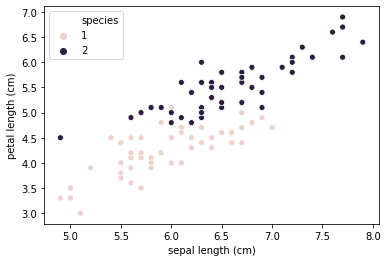

In [770]:
# 散布図
fig, ax = plt.subplots()
sns.scatterplot(x='sepal length (cm)', y="petal length (cm)", data=df_2ex, hue='species');
handles, labels = ax.get_legend_handles_labels()

# このままだと凡例に「０」が含まれる（理由がわからない）
# そのため手動でラベル変更
del handles[1], labels[1]
ax.legend(handles, labels);

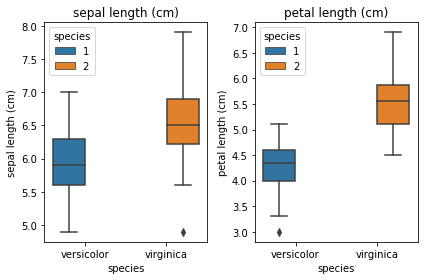

In [495]:
# 箱ひげ図
# matplotlib
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y=df_2ex.columns[0], data=df_2ex, hue='species')
plt.xticks([0, 1], ['versicolor', 'virginica'])
plt.title('sepal length (cm)')

plt.subplot(1, 2, 2)
sns.boxplot(x='species', y=df_2ex.columns[1], data=df_2ex, hue='species')
plt.xticks([0, 1], ['versicolor', 'virginica'])
plt.title('petal length (cm)')

plt.tight_layout();

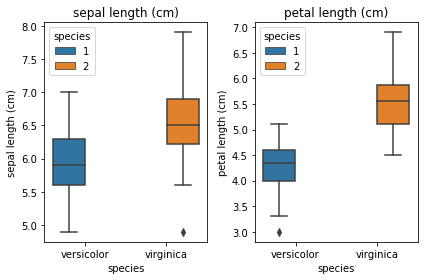

In [496]:
# 箱ひげ図
# オブジェクト指向
fig, ax = plt.subplots(1, 2)
ax1 = ax[0]
ax2 = ax[1]

sns.boxplot(x='species', y=df_2ex.columns[0], data=df_2ex, hue='species', ax=ax1)
ax1.set_xticklabels(['versicolor', 'virginica'])
ax1.set_title('sepal length (cm)')

sns.boxplot(x='species', y=df_2ex.columns[1], data=df_2ex, hue='species', ax=ax2)
ax2.set_xticklabels(['versicolor', 'virginica'])
ax2.set_title('petal length (cm)')

plt.tight_layout();

In [412]:
# 調べ物
fig.add_subplot?

In [413]:
plt.violinplot?

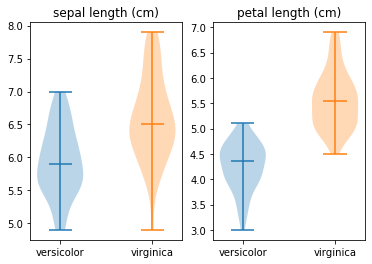

In [497]:
# バイオリン図（violinplot）
fig = plt.figure()

ax1 = fig.add_subplot(1, 2,1)
ax1.violinplot(df_2ex.query('species == 1')['sepal length (cm)'], showmedians=True, positions=[0])
ax1.violinplot(df_2ex.query('species == 2')['sepal length (cm)'], showmedians=True, positions=[1])
ax1.set_xticks([0,1])
ax1.set_xticklabels(['versicolor', 'virginica'])
ax1.set_title('sepal length (cm)')

ax2 = fig.add_subplot(1, 2, 2)
ax2.violinplot(df_2ex.query('species == 1')['petal length (cm)'], showmedians=True, positions=[0])
ax2.violinplot(df_2ex.query('species == 2')['petal length (cm)'], showmedians=True, positions=[1])
ax2.set_xticks([0,1])
ax2.set_xticklabels(['versicolor', 'virginica'])
ax2.set_title('petal length (cm)');

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


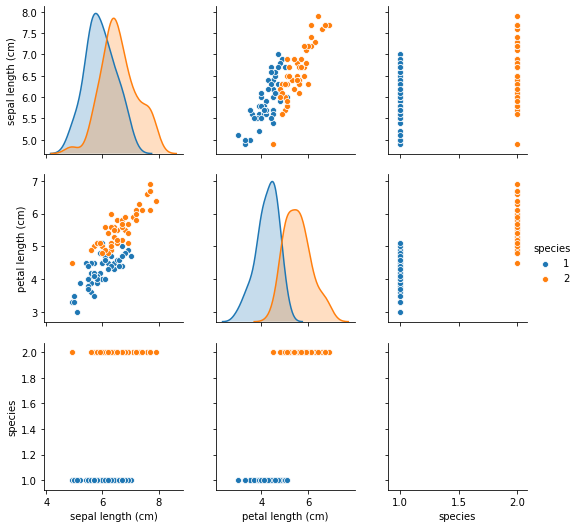

In [498]:
# ペアプロット（自主確認）
sns.pairplot(df_2ex, hue='species');

# 【問題3】前処理・訓練用データと検証用データの分割
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

In [523]:
from sklearn.model_selection import train_test_split
# ndarray変換
X_array = X.values
# yに関して一次元化（グラフ化で必要）
y_array = np.ravel(y.values)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_array, y_array, test_size=0.25, random_state=0)

In [940]:
print(X_array)

[[7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]
 [6.1 4.6]
 [5.8 4. ]
 [5.  3.3]
 [5.6 4.2]
 [5.7 4.2]
 [5.7 4.2]
 [6.2 4.3]
 [5.1 3. ]
 [5.7 4.1]
 [6.3 6. ]
 [5.8 5.1]
 [7.1 5.9]
 [6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [4.9 4.5]
 [7.3 6.3]
 [6.7 5.8]
 [7.2 6.1]
 [6.5 5.1]
 [6.4 5.3]
 [6.8 5.5]
 [5.7 5. ]
 [5.8 5.1]
 [6.4 5.3]
 [6.5 5.5]
 [7.7 6.7]
 [7.7 6.9]
 [6.  5. ]
 [6.9 5.7]
 [5.6 4.9]
 [7.7 6.7]
 [6.3 4.9]
 [6.7 5.7]
 [7.2 6. ]
 [6.2 4.8]
 [6.1 4.9]
 [6.4 5.6]
 [7.2 5.8]
 [7.4 6.1]
 [7.9 6.4]
 [6.4 5.6]
 [6.3 5.1]
 [6.1 5.6]
 [7.7 6.1]
 [6.3 5.6]
 [6.4 5.5]
 [6.  4.8]
 [6.9 5.4]
 [6.7 5.6]

In [524]:
# 形状の確認
print(X_train.shape, type(X_train))
print(X_valid.shape, type(y_train))

(75, 2) <class 'numpy.ndarray'>
(25, 2) <class 'numpy.ndarray'>


# 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

In [525]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

# 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [567]:
from sklearn.neighbors import KNeighborsClassifier

# デフォルト(n=5)
nn_5 = KNeighborsClassifier()
nn_5.fit(X_train_std, y_train)
y_predict = nn_5.predict(X_valid_std)
y_predict

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [568]:
# n=1
nn_1 = KNeighborsClassifier(n_neighbors=1)
nn_1.fit(X_train_std, y_train)
nn_1.predict(X_valid_std)

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [569]:
# n=3
nn_3 = KNeighborsClassifier(n_neighbors=3)
nn_3.fit(X_train_std, y_train)
nn_3.predict(X_valid_std)

array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

# 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

* scikit-learnを使い4種類の指標を計算する
* 混同行列をscikit-learnを使い表示する
* 4種類の指標値の意味について簡単に調査して文章でまとめる

In [570]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_predict)

0.88

In [571]:
# 適合率
from sklearn.metrics import precision_score
precision_score(y_valid, y_predict)

1.0

In [572]:
# Recall（再現率）
from sklearn.metrics import recall_score
recall_score(y_valid, y_predict)

0.7692307692307693

In [573]:
# F値
from sklearn.metrics import f1_score
f1_score(y_valid, y_predict)

0.8695652173913044

In [574]:
# 混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_predict)

array([[10,  3],
       [ 0, 12]])

* 正解率：正や負と予測したデータのうち，実際にそうであるものの割合
* 適合率：正と予測したデータのうち，実際に正であるものの割合
* 再現率：実際に正であるもののうち，正であると予測されたものの割合
* F1値：現率と適合率の調和平均

# 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [924]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel',
                    ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['white', 'pink', 'skyblue']
    # クラスの長さをクラス数
    n_class = len(set(y))

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # contourf_color、scatter_color、target_namesをクラス数に応じて変化
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap([contourf_color[n] for n in set(y)]))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80,
                    color=scatter_color[target],label=target_names[target], marker='o')
    patches = [mpatches.Patch(color=scatter_color[n], label=target_names[n]) for n in set(y)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

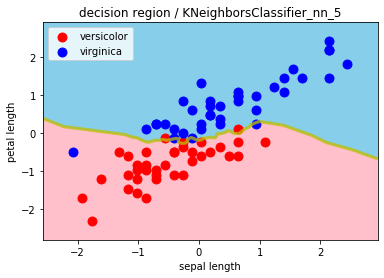

In [928]:
decision_region(X_train_std, y_train, model=nn_5, step=0.01, title='decision region / KNeighborsClassifier_nn_5',
                xlabel="sepal length", ylabel="petal length")

# 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

* 最近傍法
* ロジスティック回帰
* SVM
* 決定木
* ランダムフォレスト  
公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


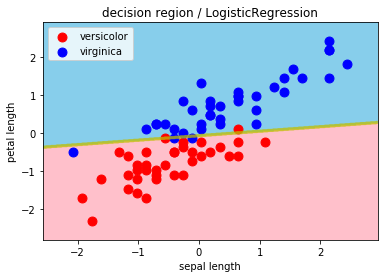

In [929]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0)
lreg.fit(X_train_std, y_train)
y_predict_lreg = lreg.predict(X_valid_std)
#  グラフ化
decision_region(X_train_std, y_train, model=lreg, step=0.01, title='decision region / LogisticRegression',
                xlabel="sepal length", ylabel="petal length")

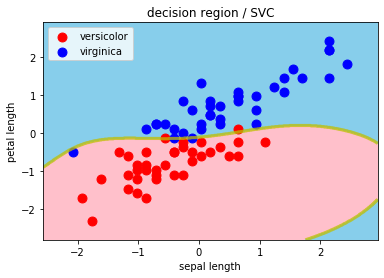

In [930]:
# SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std, y_train)
y_predict_svc = svc.predict(X_valid_std)
#  グラフ化
decision_region(X_train_std, y_train, model=svc, step=0.01, title='decision region / SVC',
                xlabel="sepal length", ylabel="petal length")

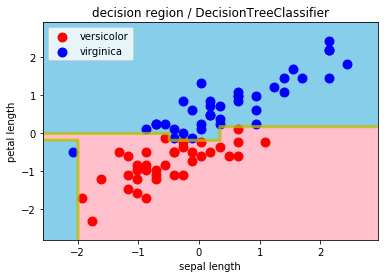

In [931]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train_std, y_train)
y_predict_dtree = dtree.predict(X_valid_std)
#  グラフ化
decision_region(X_train_std, y_train, model=dtree, step=0.01, title='decision region / DecisionTreeClassifier',
                xlabel="sepal length", ylabel="petal length")

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


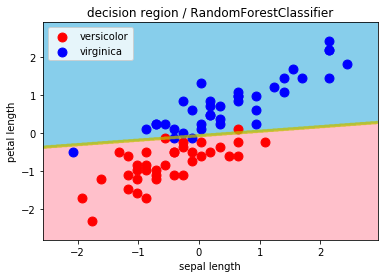

In [932]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfore = RandomForestClassifier(random_state=0)
rfore.fit(X_train_std, y_train)
y_predict_rfore = rfore.predict(X_valid_std)
#  グラフ化
decision_region(X_train_std, y_train, model=lreg, step=0.01, title='decision region / RandomForestClassifier',
                xlabel="sepal length", ylabel="petal length")

In [933]:
# それぞれのpredictをリスト結合
predict_list = [y_predict, y_predict_lreg, y_predict_svc, y_predict_dtree, y_predict_rfore]
accuracy_list =[]
precision_list = []
recall_list = []
f1_list =[]
for predict in predict_list:
    # 正解率
    accuracy_list.append(accuracy_score(y_valid, predict))
    # 適合率
    precision_list.append(precision_score(y_valid, predict))
    # Recall（再現率）
    recall_list.append(recall_score(y_valid, predict))
    # F値
    f1_list.append(f1_score(y_valid, predict))
score_list = [accuracy_list, precision_list, recall_list, f1_list]
df_score =pd.DataFrame(score_list,
                       index=['accuracy', 'precision', 'recall', 'f1'],
                       columns=['最近傍法', 'ロジスティック回帰', 'SVC', '決定木', 'ランダムフォレスト'])
df_score

,最近傍法,ロジスティック回帰,SVC,決定木,ランダムフォレスト
accuracy,0.880000,0.920000,0.920000,0.880000,0.880000
precision,1.000000,1.000000,1.000000,1.000000,1.000000
recall,0.769231,0.846154,0.846154,0.769231,0.769231
f1,0.869565,0.916667,0.916667,0.869565,0.869565


* accuracy、reccall、f1はロジスティック回帰とSVCで高い
* precisionはどの手法でも1.0
* 最近傍法とSVCは境界が曲線
* 決定木の境界は複雑
* ロジスティック回帰とランダムフォレストは境界が直線

# 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

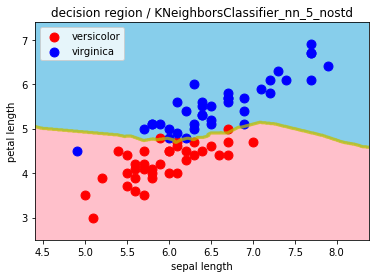

In [934]:
# 最近傍法
nn_5_nostd = KNeighborsClassifier()
nn_5_nostd.fit(X_train, y_train)
y_predict_nn_5_nostd = nn_5_nostd.predict(X_valid)
#  グラフ化
decision_region(X_train, y_train, model=nn_5_nostd, step=0.01, title='decision region / KNeighborsClassifier_nn_5_nostd',
                xlabel="sepal length", ylabel="petal length")

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


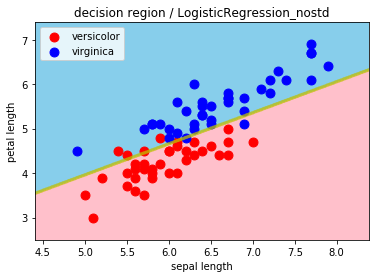

In [935]:
# ロジスティック回帰
lreg_nostd = LogisticRegression(random_state=0)
lreg_nostd.fit(X_train, y_train)
y_predict_lreg_nostd = lreg_nostd.predict(X_valid)
#  グラフ化
decision_region(X_train, y_train, model=lreg_nostd, step=0.01, title='decision region / LogisticRegression_nostd',
                xlabel="sepal length", ylabel="petal length")

# 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。

《多値になることでの変更点》

指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。

決定領域を可視化する前述の関数は適切に書き換える必要があります。

In [936]:
X_ad = df[["sepal length (cm)", "petal length (cm)"]]
y_ad = df[["species"]]

In [937]:
# ndarray変換
X_ad_array = X_ad.values
y_ad_array = np.ravel(y_ad.values)
# データ分割
X_train_ad, X_valid_ad, y_train_ad, y_valid_ad = train_test_split(
    X_ad_array, y_ad_array, test_size=0.25, random_state=1)
# 標準化
scaler_ad = StandardScaler()
scaler_ad.fit(X_train_ad)
X_train_std_ad = scaler_ad.transform(X_train_ad)
X_valid_std_ad = scaler_ad.transform(X_valid_ad)
# 最近傍法
nn_5_ad = KNeighborsClassifier()
nn_5_ad.fit(X_train_std_ad, y_train_ad)
y_predict_ad = nn_5_ad.predict(X_valid_std_ad)

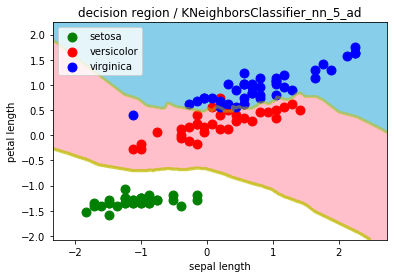

In [938]:
#  グラフ化
decision_region(X_train_std_ad, y_train_ad, model=nn_5_ad, step=0.01, title='decision region / KNeighborsClassifier_nn_5_ad',
                xlabel="sepal length", ylabel="petal length")